In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
%matplotlib inline

df = pd.read_csv("AmesHousing.tsv", sep="\t")
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [100]:
def transform_features(train):
    return train

def select_features(train):
    return train[["Gr Liv Area","SalePrice"]] #pd

#use all numerical features
def train_and_test(df):
    train = df[:1460]
    test = df[1460:]
    
    #only include the numerical types
    df_train = train.select_dtypes(include=["float","int"])
    df_test = test.select_dtypes(include=["float","int"])
    
    features = df_train.columns.tolist()
    features.remove("SalePrice")
    print(df_train[features].isnull().sum()) #need to handle np.nan stuff
    model = LinearRegression()
    model.fit(df_train[features],df_train["SalePrice"])
    hypothesis = model.predict(df_test[features])
    mse = mean_squared_error(hypothesis,df_test["SalePrice"])
    return mse**0.5

df_test = select_features(df)
test = train_and_test(df_test)
test

Gr Liv Area    0
dtype: int64


57088.25161263909

In [101]:
#feature engineering
def transform_features(df):
    null_ratio = df.isnull().sum()/df.shape[0]
    #cols with more than 10% np.nan
    low_null = null_ratio[null_ratio < 0.1]
    new_df = df[low_null.index.tolist()]
    #print(null_ratio[null_ratio > 0.1])
    
    #any text column with missing values will be dropped
    text_cols = new_df.select_dtypes(include=["object"])
    text_null_counts = text_cols.isnull().sum()
    text_null_counts = text_null_counts[text_null_counts > 0].index.tolist()
    new_df.drop(text_null_counts,axis=1,inplace=True)
    #sanity check
    #print(new_df.select_dtypes(include=["object"]).isnull().sum().sum())
    
    #fill in the numeric columns with median() for missing data
    num_null = new_df.select_dtypes(include=["int","float"]).isnull().sum()
    num_cols = num_null.index.tolist()
    new_df[num_cols] = new_df[num_cols].apply(lambda x: x.fillna(x.median()),axis=0)
    print("total np.nan:", new_df.select_dtypes(include=["int","float"]).isnull().sum().sum())
    return new_df
    
#null_check = transform_features(df)
#null_check.head()
#df.isnull().sum()/df.shape[0]
df_transformed = transform_features(df)
#df_transformed["Yr Sold"].head(5)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/core/frame.py:2540: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


total np.nan: 0


In [102]:
#adding useful features for our model
def add_features(df):
    built_sold = df["Yr Sold"] - df["Year Built"]
    df["built_sold"] = built_sold
    remodel_sold = df['Yr Sold'] - df['Year Remod/Add']
    df["remodel_sold"] = remodel_sold #prevent garbage
    
    #drop the useless/biased cols in linear regression
    rem_cols = ["Year Built", "Year Remod/Add","PID", "Order","Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"]
    df.drop(rem_cols,axis=1,inplace=True)
    return df
'''
df = add_features(null_check)
print((df[["built_sold","remodel_sold"]] < 0).sum())
df = df[(df["built_sold"] > 0) & (df["remodel_sold"] > 0)]
print((df[["built_sold","remodel_sold"]] < 0).sum())
#worked! ;)
#df["Yr Sold"]
'''
df_transformed = add_features(df_transformed)


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

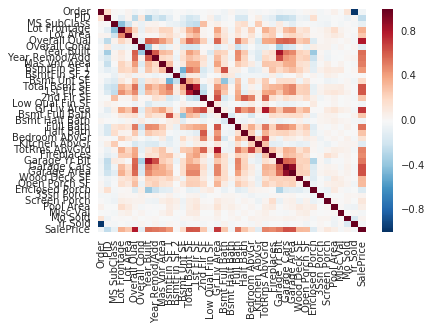

In [103]:
#generating a heatmap to determine features with correlations
df_corr = df.corr()
sns.heatmap(df_corr)

In [104]:
df_corr["SalePrice"].abs().sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647877
Garage Area        0.640401
Total Bsmt SF      0.632280
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Garage Yr Blt      0.526965
Mas Vnr Area       0.508285
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.432914
Lot Frontage       0.357318
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.276050
2nd Flr SF         0.269373
Lot Area           0.266549
PID                0.246521
Bsmt Unf SF        0.182855
Bedroom AbvGr      0.143913
Enclosed Porch     0.128787
Kitchen AbvGr      0.119814
Screen Porch       0.112151
Overall Cond       0.101697
MS SubClass        0.085092
Pool Area          0.068403
Low Qual Fin SF    0.037660
Bsmt Half Bath     0.035835
Mo Sold            0.035259
3Ssn Porch         0.032225
Order              0

In [105]:
def select_features(df,threshold):
    df_corr = df.corr()
    #some of the features aren't really correlating well. It may as well add in more noise in our data. Let's just keep anything with 0.5 correlation and above
    features_keep = df_corr[df_corr["SalePrice"].abs() > threshold].index.tolist()
    #print(features_keep)
    return features_keep
keep_features =  select_features(df_transformed,0.3)

df_transformed = df_transformed[keep_features]
df_transformed.columns

Index(['Overall Qual', 'Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF',
       '1st Flr SF', 'Gr Liv Area', 'Full Bath', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'SalePrice', 'built_sold', 'remodel_sold'],
      dtype='object')

In [106]:
## Create a list of column names from documentation that are *meant* to be categorical
nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]

In [107]:
counter = 0
for col in nominal_features:
    if col in df_transformed.columns:
        counter += 1
print(counter)



to_categorical = [] 
#columns to transform to categorical based on a list above
for col in nominal_features:
    if col in df_transformed.columns:
        print(col)
        to_categorical.append(col)
print(df_transformed.columns)
#df_transformed["Full Bath"].value_counts().shape[0]
#How many unique values in each categorical column? 
#Dropping any categorical columns with more than 8 options
for col in to_categorical:
    if df_transformed[col].value_counts().shape[0] > 10:
        df_transformed.drop(col, axis=1,inplace=True)
        
df_transformed.head()


0
Index(['Overall Qual', 'Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF',
       '1st Flr SF', 'Gr Liv Area', 'Full Bath', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'SalePrice', 'built_sold', 'remodel_sold'],
      dtype='object')


,Overall Qual,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,SalePrice,built_sold,remodel_sold
0,6,112.0,639.0,1080.0,1656,1656,1,7,2,1960.0,2.0,528.0,210,62,215000,50,50
1,5,0.0,468.0,882.0,896,896,1,5,0,1961.0,1.0,730.0,140,0,105000,49,49
2,6,108.0,923.0,1329.0,1329,1329,1,6,0,1958.0,1.0,312.0,393,36,172000,52,52
3,7,0.0,1065.0,2110.0,2110,2110,2,8,2,1968.0,2.0,522.0,0,0,244000,42,42
4,5,0.0,791.0,928.0,928,1629,2,6,1,1997.0,2.0,482.0,212,34,189900,13,12


In [108]:
#transforming the remaining categorical items
categorical_cols = df_transformed.select_dtypes(include=['object'])
for col in categorical_cols:
    df_transformed[col] = df_transformed[col].astype('category')
df_transformed.dtypes
df_cat= pd.get_dummies(df[categorical_cols])
#categorical_cols
df_transformed = pd.concat([df_transformed,df_cat],axis=1)
df_transformed.head()

,Overall Qual,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,TotRms AbvGrd,Fireplaces,Garage Yr Blt,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,6,112.0,639.0,1080.0,1656,1656,1,7,2,1960.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,0.0,468.0,882.0,896,896,1,5,0,1961.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6,108.0,923.0,1329.0,1329,1329,1,6,0,1958.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7,0.0,1065.0,2110.0,2110,2110,2,8,2,1968.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0.0,791.0,928.0,928,1629,2,6,1,1997.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
